In [1]:
#Библиотеки:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from category_encoders.binary import BinaryEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

Задание 1
Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),s 
        ('дождь', True),
        ('облачно', True),
]

df = pd.DataFrame(data, columns=['weather', 'stroll'])
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_rain_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])
p_stroll_if_rain = (p_stroll*p_rain_if_stroll)/p_rain
p_stroll_if_rain

0.3333333333333333

Задание 2
загрузите датасет для классификации, проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
Масштабируйте числовые признаки
В случае дисбаланса проведите балансировку
решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score

In [4]:
#Загрузка датасета и предобработка данных...
data = pd.read_csv('D:/ML/data/classification/airlines_task.csv')
data = data.drop(["id"], axis=1)
data = data.drop_duplicates()
data = data.dropna()

vc = data.AirportFrom.value_counts()
vc = vc[vc.between(500, 20000, inclusive='neither')].index.to_list()
data = data[data.AirportFrom.isin(vc)]

vc = data.AirportTo.value_counts()
vc = vc[vc.between(500, 20000, inclusive='neither')].index.to_list()
data = data[data.AirportTo.isin(vc)]

vc = data.Time.value_counts()
vc = vc[vc.between(100, 5000, inclusive='neither')].index.to_list()
data = data[data.Time.isin(vc)]

vc = data.Length.value_counts()
vc = vc[vc.between(100, 6000, inclusive='neither')].index.to_list()
data = data[data.Length.isin(vc)]

vc = data.Flight.value_counts()
vc = vc[vc.between(10, 200, inclusive='neither')].index.to_list()
data = data[data.Flight.isin(vc)]

data.reset_index(drop= True, inplace= True)

bn = BinaryEncoder()

df_bn = bn.fit_transform(data.Airline)
data = data.drop(["Airline"], axis=1)
data = data.join(df_bn)

df_bn = bn.fit_transform(data.AirportFrom)
data = data.drop(["AirportFrom"], axis=1)
data = data.join(df_bn)

df_bn = bn.fit_transform(data.AirportTo)
data = data.drop(["AirportTo"], axis=1)
data = data.join(df_bn)
print(data.describe())
print(data)
data.to_csv('D:/ML/data/classification/airlines_task_preprocessed.csv')

              Flight      DayOfWeek           Time         Length  \
count  144471.000000  144471.000000  144471.000000  144471.000000   
mean     1851.802431       3.926345     795.531546     135.999398   
std      1573.937809       1.886051     275.767929      61.325375   
min         1.000000       1.000000     330.000000      35.000000   
25%       654.000000       2.000000     550.000000      90.000000   
50%      1483.000000       4.000000     785.000000     125.000000   
75%      2547.000000       5.000000    1035.000000     166.000000   
max      7306.000000       7.000000    1439.000000     385.000000   

               Delay      Airline_0      Airline_1      Airline_2  \
count  144471.000000  144471.000000  144471.000000  144471.000000   
mean        0.376491       0.040673       0.268144       0.445342   
std         0.484507       0.197531       0.442994       0.497005   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [2]:
df = pd.read_csv('D:/ML/data/classification/airlines_task_preprocessed.csv', index_col=0)

y = df["Delay"].values
X = df.drop(["Delay"], axis=1).values

print(f"Количество объектов классов: 0 и 1 до андерсемплинга {Counter(y)}")


underSampler = RandomUnderSampler(random_state=42)
X_under_sample, y_under_sample = underSampler.fit_resample(X,y)

print(f"Количество объектов классов: 0 и 1 после андерсемплинга {Counter(y_under_sample)}")

X_train, X_test, y_train, y_test = train_test_split(X_under_sample, y_under_sample, test_size=0.2, random_state=4)

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = standardScaler.transform(X_train)
X_test_std = standardScaler.transform(X_test)


minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_train)
X_train_mms = minMaxScaler.transform(X_train)
X_test_mms = minMaxScaler.transform(X_test)

Количество объектов классов: 0 и 1 до андерсемплинга Counter({0: 90079, 1: 54392})
Количество объектов классов: 0 и 1 после андерсемплинга Counter({0: 54392, 1: 54392})


In [3]:
def plot_roc_curve(y_true, probs):
    probs = probs[:, 1]
    auc_ = roc_auc_score(y_true, probs)
    print(' ROC AUC=%.3f' % (auc_))
    fpr, tpr, treshold = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
            label='ROC кривая (AUC = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.show()

def showMetrics(y_true, y_predict, y_proba):
    print(f"Accuracy: {accuracy_score(y_true, y_predict)}")
    print(f"Confusion matrix:\n {confusion_matrix(y_true, y_predict)}")
    print(f"Precision, Recall, F-score:\n{classification_report(y_true, y_predict)}")
    plot_roc_curve(y_true, y_proba)
    
def GNB(X_train, y_train, X_test, y_test):
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
    gnb = GaussianNB()
    gs = RandomizedSearchCV(gnb, param_distributions=params_NB, cv=5,verbose=1, 
                 scoring='accuracy')
    gs.fit(X_train, y_train)
    print(gs.best_params_)
    gnb_pred = gs.predict(X_test)
    gnb_probs = gs.predict_proba(X_test)
    showMetrics(y_test, gnb_pred, gnb_probs)

def LogisticRegressionCall(X_train, y_train, X_test, y_test):
    logistic = LogisticRegression(random_state=0)
    distributions = dict(C= np.arange(1,10,0.1),penalty=['l2', 'l1'])
    clf = RandomizedSearchCV(logistic, distributions, random_state=0)
    search = clf.fit(X_train, y_train)
    print(search.best_params_)
    best_params = search.best_params_
    logRes = LogisticRegression(penalty=best_params["penalty"], C= best_params["C"])
    logRes.fit(X_train, y_train)
    pred = logRes.predict(X_test)
    probs = logRes.predict_proba(X_test)
    showMetrics(y_test, pred, probs)
    
def SVMCall(X_train, y_train, X_test, y_test):
    param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
    grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
    search = grid.fit(X_train, y_train)
    print(search.best_params_)
    pred = grid.predict(X_test)
    probs = grid.predict_proba(X_test)
    showMetrics(y_test, pred, probs)

Accuracy: 0.6150664154065358
Confusion matrix:
 [[6871 3941]
 [4434 6511]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62     10812
           1       0.62      0.59      0.61     10945

    accuracy                           0.62     21757
   macro avg       0.62      0.62      0.61     21757
weighted avg       0.62      0.62      0.61     21757

 ROC AUC=0.660


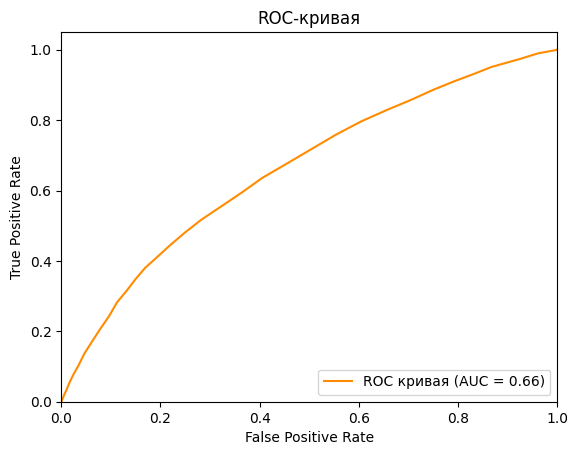

In [82]:
#Метод k-ближайших соседей(kNN, k-nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=58, metric='minkowski', p=2) 
knn.fit(X_train_mms, y_train)
y_knn_predict = knn.predict(X_test_mms)
knn_probs = knn.predict_proba(X_test_mms)
showMetrics(y_test, y_knn_predict,  knn_probs)

In [70]:
k_range = list(range(1, 61))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_mms, y_train)
grid_search.best_params_

Fitting 2 folds for each of 60 candidates, totalling 120 fits


{'n_neighbors': 58}

Данные без масштабирования
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 1e-07}
Accuracy: 0.5844556803436395
Confusion matrix:
 [[5041 6085]
 [3202 8021]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52     11126
           1       0.57      0.71      0.63     11223

    accuracy                           0.58     22349
   macro avg       0.59      0.58      0.58     22349
weighted avg       0.59      0.58      0.58     22349

 ROC AUC=0.635


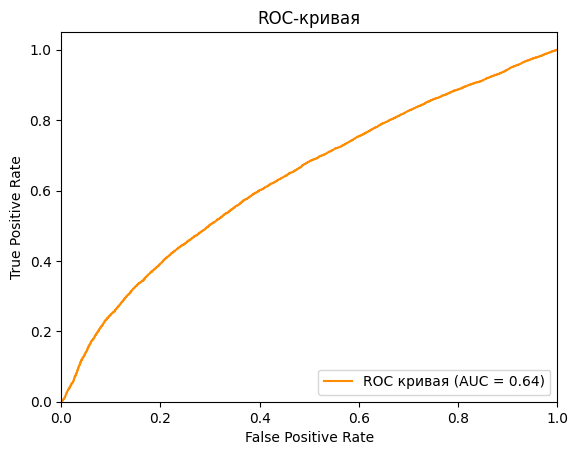

Данные с нормализацией
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 0.0012328467394420659}
Accuracy: 0.5806523781824691
Confusion matrix:
 [[5011 6115]
 [3257 7966]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52     11126
           1       0.57      0.71      0.63     11223

    accuracy                           0.58     22349
   macro avg       0.59      0.58      0.57     22349
weighted avg       0.59      0.58      0.57     22349

 ROC AUC=0.632


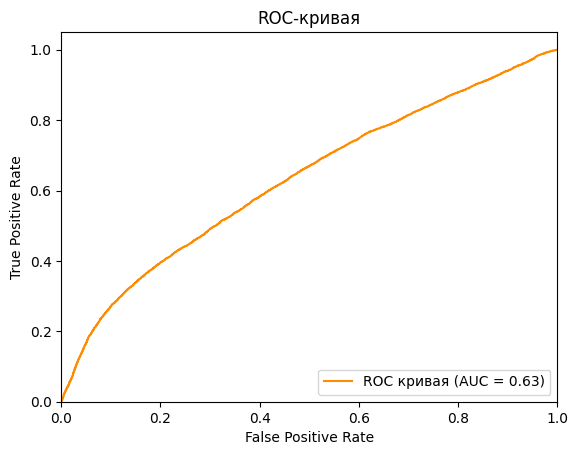

Данные с стандартизацией
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 2.310129700083158e-07}
Accuracy: 0.5807866123763927
Confusion matrix:
 [[5007 6119]
 [3250 7973]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52     11126
           1       0.57      0.71      0.63     11223

    accuracy                           0.58     22349
   macro avg       0.59      0.58      0.57     22349
weighted avg       0.59      0.58      0.57     22349

 ROC AUC=0.632


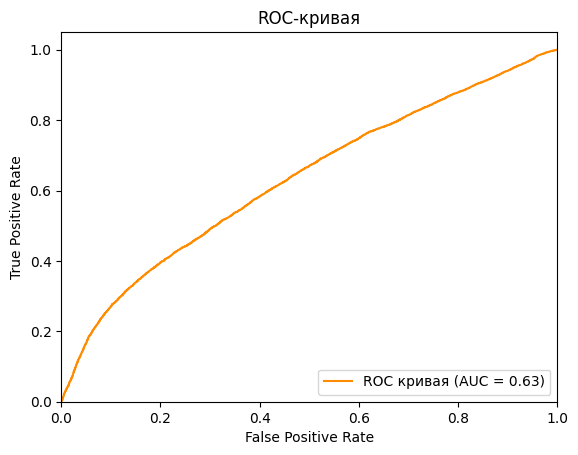

In [72]:
print("Данные без масштабирования")
GNB(X_train, y_train, X_test, y_test)
print("Данные с нормализацией")
GNB(X_train_mms, y_train, X_test_mms, y_test)
print("Данные с стандартизацией")
GNB(X_train_std, y_train, X_test_std, y_test)

{'penalty': 'l2', 'C': 9.000000000000007}
Accuracy: 0.5692632553296115
Confusion matrix:
 [[9834 7405]
 [7486 9846]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57     17239
           1       0.57      0.57      0.57     17332

    accuracy                           0.57     34571
   macro avg       0.57      0.57      0.57     34571
weighted avg       0.57      0.57      0.57     34571

 ROC AUC=0.604


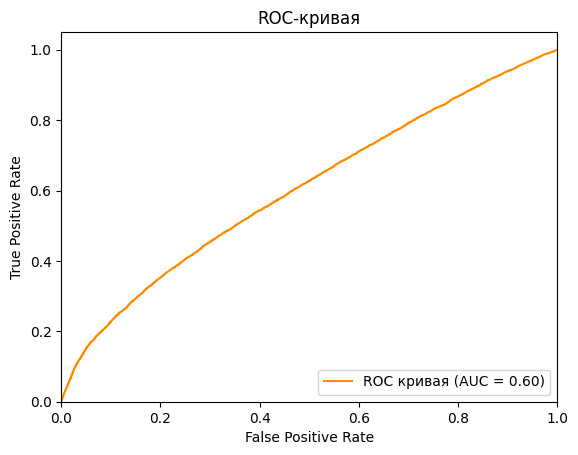

{'penalty': 'l2', 'C': 3.8000000000000025}
Accuracy: 0.5752798588412253
Confusion matrix:
 [[9977 7262]
 [7421 9911]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58     17239
           1       0.58      0.57      0.57     17332

    accuracy                           0.58     34571
   macro avg       0.58      0.58      0.58     34571
weighted avg       0.58      0.58      0.58     34571

 ROC AUC=0.611


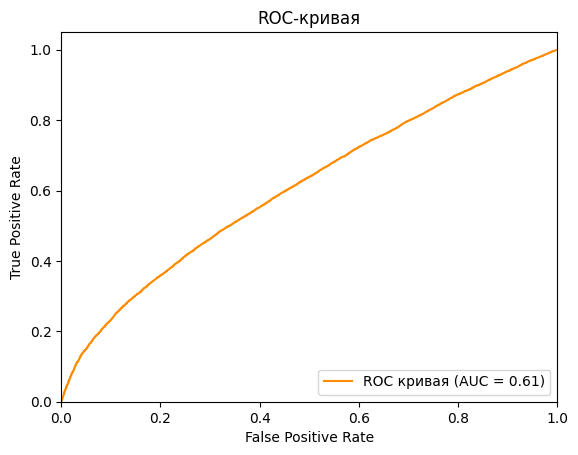

{'penalty': 'l2', 'C': 9.000000000000007}
Accuracy: 0.5752798588412253
Confusion matrix:
 [[9977 7262]
 [7421 9911]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58     17239
           1       0.58      0.57      0.57     17332

    accuracy                           0.58     34571
   macro avg       0.58      0.58      0.58     34571
weighted avg       0.58      0.58      0.58     34571

 ROC AUC=0.611


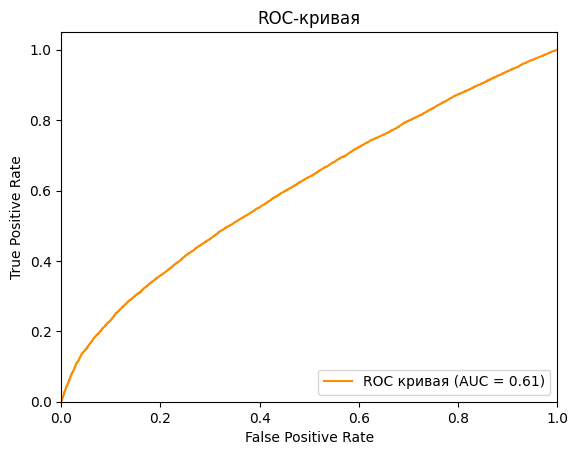

In [75]:
LogisticRegressionCall(X_train, y_train, X_test, y_test )
LogisticRegressionCall(X_train_mms, y_train, X_test_mms, y_test )
LogisticRegressionCall(X_train_std, y_train, X_test_std, y_test )

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=  11.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   8.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   8.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   8.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   8.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   8.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   8.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   8.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   8.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   8.2s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.499 total time=   8.4s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;,

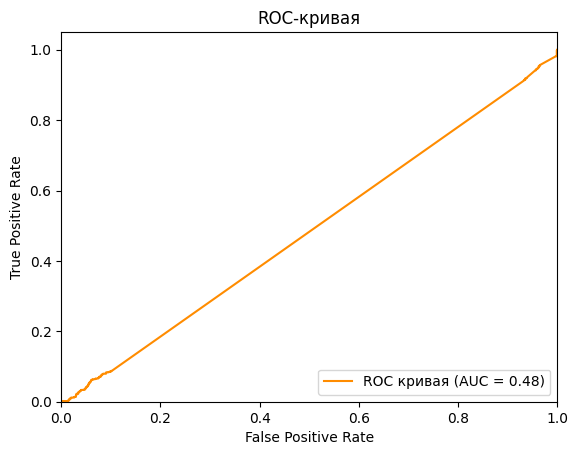

In [4]:
#support vector machine
SVMCall(X_train[:5000], y_train[:5000], X_test[:2000], y_test[:2000] )

Задание 3
Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1
Самостоятельно реализуйте kNN и Naive Bayes

In [4]:
class MetricsClassification:
    @staticmethod
    def accuracy(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return len([x for x, y  in zip(y_true, predictions) if x  == y])/len(y_true)
    
    @staticmethod
    def confusion_matrix(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        TP = FP =TN =FN = 0
        for test, pred in zip(y_true, predictions):
            if (test == 1 and pred == 1):
                TP += 1 
            elif (test == 0 and pred == 0):
                TN += 1
            elif (test == 1 and pred == 0):
                FN += 1
            elif (test == 0 and pred == 1):
                FP += 1
        return [[TP, FP],
                         [FN, TN]]
    @staticmethod
    def precision( y_test, y_pred):
        matrix = MetricsClassification.confusion_matrix(y_test, y_pred)
        TP = matrix[0][0]
        FP = matrix[0][1]
        return TP/(TP + FP)
    @staticmethod
    def recall(y_test, y_pred):
        matrix = MetricsClassification.confusion_matrix(y_test, y_pred)
        TP = matrix[0][0]
        FN = matrix[1][0]
        return TP/(TP + FN)
    
    @staticmethod
    def f_score(y_test, y_pred):
        recall_score = MetricsClassification.recall(y_test, y_pred)
        precision_score = MetricsClassification.precision(y_test, y_pred)
        return 2*(recall_score * precision_score)/ (recall_score+precision_score)

In [84]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = np.array(self.y_train)[indices]
            most_common_label = np.bincount(k_nearest_labels).argmax()
            predictions.append(most_common_label)
        return predictions

knn = KNN(10)
knn.fit(X_train[:30000], y_train[:30000])
predictions = knn.predict(X_test[:1000])
print(MetricsClassification.accuracy(y_test[:1000], predictions))
print(accuracy_score(y_test[:1000], predictions))
print(MetricsClassification.confusion_matrix(y_test[:1000], predictions))
print(confusion_matrix(y_test[:1000], predictions))
print(MetricsClassification.precision(y_test[:1000], predictions))
print(precision_score(y_test[:1000], predictions))
print(MetricsClassification.recall(y_test[:1000], predictions))
print(recall_score(y_test[:1000], predictions))
print(MetricsClassification.f_score(y_test[:1000], predictions))
print(f1_score(y_test[:1000], predictions))

0.51
0.51
[[217, 187], [303, 293]]
[[293 187]
 [303 217]]
0.5371287128712872
0.5371287128712872
0.4173076923076923
0.4173076923076923
0.4696969696969697
0.4696969696969697


In [85]:
#Реализация Naive Bayes...
# class NaiveBayes:
#     def __init__(self):
#         self.classes = None
#         self.class_prior = None
#         self.feature_prob = None

#     def fit(self, X, y):
#         self.classes = np.unique(y)
#         n_classes = len(self.classes)

#         # Априорная вероятность каждого класса
#         self.class_prior = np.zeros(n_classes)
#         for i, c in enumerate(self.classes):
#             self.class_prior[i] = np.sum(y == c) / len(y)

#         # вероятность того, что каждый объект примет каждое возможное значение, учитывая, что выборка принадлежит к этому классу
#         self.feature_prob = np.zeros((n_classes, X.shape[1]))
#         for i, c in enumerate(self.classes):
#             X_c = X[y == c]
#             self.feature_prob[i, :] = (X_c.sum(axis=0) + 1) / (X_c.shape[0] + 2)

#     def predict(self, X):
#         n_samples, n_features = X.shape
#         pred = np.zeros(n_samples)

#         for i in range(n_samples):
#             # апостериорная вероятность каждого класса для текущей выборки
#             posteriors = np.zeros(len(self.classes))
#             for j, c in enumerate(self.classes):
#                 prior = np.log(self.class_prior[j])
#                 likelihood = np.sum(np.log(self.feature_prob[j, :]) * X[i])
#                 posteriors[j] = prior + likelihood

#             # Присваиваем текущей выборке класс с наибольшей апостериорной вероятностью
#             pred[i] = self.classes[np.argmax(posteriors)]

#         return pred

    
# NB = NaiveBayes()
# NB.fit(X_train, y_train)
# predictions = NB.predict(X_test)
# print(MetricsClassification.accuracy(y_test, predictions))
# print(accuracy_score(y_test, predictions))
# print(MetricsClassification.confusion_matrix(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(MetricsClassification.precision(y_test, predictions))
# print(precision_score(y_test, predictions))
# print(MetricsClassification.recall(y_test, predictions))
# print(recall_score(y_test, predictions))
# print(MetricsClassification.f_score(y_test, predictions))
# print(f1_score(y_test, predictions))

0.5228202417612723
0.5228202417612723
[[2993, 2430], [7952, 8382]]
[[8382 2430]
 [7952 2993]]
0.5519085377097548
0.5519085377097548
0.2734582000913659
0.2734582000913659
0.36571358748778104
0.36571358748778104


In [7]:
# class NaiveBayes2:
#     def fit(self, X, y):
#         self.X_train = X
#         self.y_train = y
#         n_samples, n_features = X.shape
#         self._classes = np.unique(y)
#         self.n_classes = len(self._classes)

#         self.mean = np.zeros((self.n_classes, n_features), dtype=np.float64)
#         self.var = np.zeros((self.n_classes, n_features), dtype=np.float64)
#         self.priors = np.zeros(self.n_classes, dtype=np.float64)

#         for idx, c in enumerate(self._classes):
#             X_c = X[y == c]
#             self.mean[idx, :] = X_c.mean(axis=0)
            
#             self.var[idx, :] = X_c.var(axis=0)

#             self.priors[idx] = X_c.shape[0] / float(n_samples)
#         return self

#     def predict(self, X):
#         y_pred = []
#         for x_test in X:
#             p = {}

#             for index_class in range(self.n_classes):
#                 p[index_class] = self.priors[index_class]

#                 for index, feature in enumerate(x_test):
#                     p[index_class] *= self.gaussian_density(feature, self.mean[index_class][index],self.var[index_class][index])
#             y_pred.append(pd.Series(p).values.argmax()) 
#         return y_pred  

#     def gaussian_density(self, x, mean, var):
#         if(var == 0):
#             return 1
#         const = 1 / np.sqrt(var * 2 * np.pi)
#         proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
#         result = const * proba
#         return result

    
# NB = NaiveBayes2()
# NB.fit(X_train, y_train)
# predictions = NB.predict(X_test)
# print(MetricsClassification.accuracy(y_test, predictions))
# print(accuracy_score(y_test, predictions))
# print(MetricsClassification.confusion_matrix(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(MetricsClassification.precision(y_test, predictions))
# print(precision_score(y_test, predictions))
# print(MetricsClassification.recall(y_test, predictions))
# print(recall_score(y_test, predictions))
# print(MetricsClassification.f_score(y_test, predictions))
# print(f1_score(y_test, predictions))

0.5863859907156318
0.5863859907156318
[[7615, 5669], [3330, 5143]]
[[5143 5669]
 [3330 7615]]
0.5732460102378801
0.5732460102378801
0.6957514846962083
0.6957514846962083
0.6285855792645176
0.6285855792645176


In [17]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)

        self.mean = np.zeros((self.n_classes, X.shape[1]))
        self.var = np.zeros((self.n_classes, X.shape[1]))
        self.priors = np.zeros(self.n_classes)

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i, :] = X_c.mean(axis=0)#среднее значение каждого признака для каждого класса
            self.var[i, :] = X_c.var(axis=0) #дисперсия каждого признака для каждого класса
            self.priors[i] = X_c.shape[0] / X.shape[0]#априорные вероятности каждого класса

    def predict(self, X):
        posteriors = np.zeros((X.shape[0], self.n_classes))
        for i, c in enumerate(self.classes):
            prior = np.log(self.priors[i]) #Априорная вероятность текущего класса в логарифмическом пространстве
            #считаем апостериорную вероятность для каждого класса. плотность вероятности Гаусса для каждого признака текущего класса
            posteriors[:, i] = prior + np.sum(-0.5 * np.log(2 * np.pi * self.var[i, :]) - 0.5 * ((X - self.mean[i, :]) ** 2) / self.var[i, :], axis=1)
            #Квадратная разность между значениями признаков и их соответствующим средним значением, нормализованная дисперсией
            print(type(posteriors[:, i]))
            break;
        return self.classes[np.argmax(posteriors, axis=1)]#берем класс с максимальной апостериорной вероятностью

NB = GaussianNaiveBayes()
NB.fit(X_train, y_train)
predictions = NB.predict(X_test)
print(MetricsClassification.accuracy(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(MetricsClassification.confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(MetricsClassification.precision(y_test, predictions))
print(precision_score(y_test, predictions))
print(MetricsClassification.recall(y_test, predictions))
print(recall_score(y_test, predictions))
print(MetricsClassification.f_score(y_test, predictions))
print(f1_score(y_test, predictions))

<class 'numpy.ndarray'>
0.5030564875672198
0.5030564875672198
[[10945, 10812], [0, 0]]
[[    0 10812]
 [    0 10945]]
0.5030564875672198
0.5030564875672198
1.0
1.0
0.6693780196929852
0.6693780196929852


вычисление логарифма априорных вероятностей класса делается потому, что 
умножение малых вероятностей может привести к численному "недоливу",
что может вызвать проблемы с точностью с плавающей запятой.
Вычисляя логарифм вероятностей, мы можем преобразовать операцию умножения в операцию суммирования,
которая является более численно стабильной. Кроме того, при вычислении апостериоров используется логарифм дисперсии,
чтобы избежать проблем с недопотоком при вычислении плотности Гаусса

